In [2]:
from selenium.webdriver import Chrome
import time
from bs4 import BeautifulSoup 
import requests as r
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Описание проекта

В этом проекте я хочу проанализировать статьи, публикуемые в различных журнала на тему #BlackLivesMatter. 

Для этого я взяла три разных журнала: The economist, CNN и New York Post, и спарсила практически все статьи в них, кторые можно найти по данному запросу. Именно эти три были выбрали для того, чтобы немного диверсифицировать выборку и не склоняться в какую либо сторону. Так, воспользовавшись [этой оценкой](https://www.adfontesmedia.com/?v=402f03a963ba) различных изданий, мы выбираем The economist как neutral biased, CNN - skews left и New York Post - skews right.

Мы попробуем сравнить эти три издания между собой - есть ли какие-либо различиях с статьях на эту тему, публикуемых в разных журналах. А также посмотрим на различия в статьях до убийства Джоржда Флойда и возникновения огромных протестов и после.

Для этого мы воспользуемся двумя основными показателями:

- Мы посмотрим на наиболее употребляемые слова в разных изданиях и в разные промежутки времени

- Оценим эмоциональную окрашенность данных статей

Построим графики и проанализируем.

После анализа данных статей, в завершение проекта, обучим модель машинного обучения на данных по употребляемым словам и научимся предсказывать, к какому изданию может относиться та или иная статья. Создадим для этого страничку с помощью streamlit.

**Note**: для качественных выводов, скорее всего, использовались чуть более старые данные, чем ваши (т.к. я это делала минимум неделю назад), поэтому есть вероятность, что не все будет в точности совпадать с теми графиками, что вы видите.

### Баллы

- **Обработка данных с помощью pandas. 2/2**

2 — использовались продвинутые возможности pandas, соответствующие наиболее сложных задачам домашних работ или выходящие за рамки домашних работ.

Однозначно 2. В проекте много работы с dataframe, используется специальный тип для даты и времени, много соединений таблиц, замены значений в них, изменений индексов, двойные индексы, изменение колонок, groupby + функции для вычисления характеристик к группированным талицам. Это точно сложнее средних задач

- **Веб-скреппинг. 2/2** 

2 - использовались более сложные технологии скреппинга (Selenium, scrapy и др.)

Однозначно 2. В проекте я использую и Selenium, и beautifulsoup в большом объеме. Без первого не обойтись, так как мне необходимо листать страницы, а я заранее не знаю их количества + на некоторых сайтах просто нет страниц, а есть кномка "далее". Beautifulsoup - для удобного скреппинга после того, как мы получили список ссылок, пролистав страницы


- **Работа с REST API (XML/JSON). 2/2?**

1 — использовались API примерно в объеме задач домашней работы; 2 — нетривиальное использование API, существенно выходящее за рамки обсуждавшегося в домашних работах.

Я думаю, что мое API сложнее чем в домашних работах, так как для него необходимо установить дополнительную библиотеку, настроить соединение через адрес и ключ. В дз такого не было, но вопрос в том, что значит "существенно" выходящие. Хотя если это не 2 балла, тогда что 2 балла?

- **Визуализация данных. 2/2**

1 — базовые визуализации типа «построен scatter plot»; 2 — более сложные визуализации, требующие написания нетривиального кода.

Однозначно 2. У меня явно сложнее, чем просто scatter plot, а именно: не мало графиков, почти все из них требуют написания более чем пары строчек кода; Один из графиков состоит из 12 маленьких, сделан с помощью pyplot.subplots и сложного цикла, чтобы пройтись по всем данным + (во всех графиках) много редактирующих функций вроде использования стилизации, замены осей, подписей, заголовков, цвета + ticks и yticks_labels для замены осей на слова

- **Математические возможности Python 1/1** 

(содержательное использование numpy/scipy, SymPy и т.д. для решения математических задач)

Однозначно 1. Использовался numpy для создания матрицы для обучения модели (включая обработку данных - нормализацию и стандартизацию полученной матрицы для лучшего результата)

- **Streamlit. 2/2**

2 — проект размещён в интернете (скачивать ничего не надо, достаточно пройти по ссылке и всё запустится).

Однозначно 2. Сделала страничку с предсказанием и загрузила. **[Ссылка](https://fast-brook-89678.herokuapp.com/)**
(описание ниже)

- **SQL	1/1**

В одном месте не очень удобно было использовать pandas
    
- **Регулярные выражения 1/1** 

Однозначно 1. Используются для обработки текстов и разбивания на слова: нужно убрать все символы кроме букв и дефисов, убедится, что вместо запятых поставились пробелы (чтобы слова можно было разделить) и, самое главное, нужно избавиться от местоимений и предлогов - т.е. убрать все короткие слова, а проще всего их убрать серез регулярные выражения.


- **R, tidyverse, ggplot2 и дополнения к нему не использовались - 0** 

(Ну потому что зачем в 2ух местах что-то делать, если можно в питоне)


- **Технологии, необходимые для реализации проекта, и не обсуждавшиеся в курсе. - 1+**	

1 — использовались немножко (на уровне «скачать пример из документации, разобраться, как он работает, и прикруть к своему проекту); 2 — использовались на продвинутом уровне.

Я добавила в свой проект немного (хотя, наверное, больше, чем немного) машинного обучения с помощью *sklearn*. Так как это не входит в другие категории, то это можно считать как *другие технологии* (хотя мы и немного затрагивали это на последней лекции, но я спросила у Ильи)


- **Объём (осмысленных строк кода). 1/1**

Однозначно 1. Строк явно больше 120) Даже если посчитать повторяющиеся куски в веб-скеппинге как один (Хотя там одинаковая только структура! - у каждого сайта свои классы и html код)

- **Целостность проекта 1/1** 

Однозначно 1. Вроде как все по делу, даже не стала пытаться добавлять R

- **Общее впечатление. 1?** 

0 — ну ок; 1 — вау, круто! - Ну мне понравилось :)


**Минимальный балл: 15; Прогнозируемый: 16-17**

# Парсим данные 

Тут мы используем и **Selenium** (без него не обойтись, так как нам нужно листать страницы, а мы не знаем их количество + в New York Post даже не страницы, а просто "далее") и **beautifulsoup**

**Если не хочется ждать или проблемы с driver'ом, можно загрузить из CSV** см. ниже

**Важно**: чтобы все работало надо согласиться на куки, иначе они кнопки перекрывают; Если не сработало сразу, согласитесь и перезапустите ячейку

## The economist

#### Сначала соберем ссылки на статьи по нашему запросу

In [3]:
search='BlackLivesMatter' #поисковый запрос общий для всех изданий
#Тут пропишите путь к вашему chromedriver или подключите другой
driver = Chrome(executable_path="./chromedriver")

In [4]:
#Собираем ссылки
#ВАЖНО чтобы работало надо согласиться на куки, иначе они кнопки перекрывают 
#(согласитесь и перезапустите ячейку, если не сработало сразу)
#Note: Структура этого кода как на лекции, но почти все содержание прилось переделать

links_economist=[]
url = "https://www.economist.com/search?q="+search
driver.get(url)

for page in range(100):
    print(f"Processing page {page}")
    time.sleep(3)
    links = driver.find_elements_by_css_selector(".search-result")
    
    #Вытаскиваем ссылки на статьи 
    for element in links:
        links_economist.append(element.get_attribute('href'))
    
    #Листаем странички, перестаем листать, когда у кнопки пропадает ссылка
    next_link = driver.find_elements_by_class_name("ds-pagination__nav-link")[1]
    if next_link.get_attribute('href') is None:
        print("That's all")
        break
    next_link.click()
driver.close()

Processing page 0
Processing page 1
Processing page 2
Processing page 3
Processing page 4
Processing page 5
Processing page 6
Processing page 7
Processing page 8
Processing page 9
That's all


In [6]:
#Посмотрим на них
links_economist[:3]

['https://www.economist.com/prospero/2015/01/15/blacklivesmatter',
 'https://www.economist.com/united-states/2020/05/21/whatever-happened-to-black-lives-matter',
 'https://www.economist.com/democracy-in-america/2015/08/17/what-the-black-lives-matter-campaign-gets-wrong']

#### Теперь спарсим нужные данные и сделаем табличку
Для каждой статьи вытащим дату публикации, название, 1ый абзац и сохраним ссылку. Для этого уже воспользуемся BeautifulSoup, чтобы это было попроще.

In [7]:
data_economist={'header':[], 'link': [], 'date':[], 'text':[]}
for link in links_economist:
    data = r.get(link).text
    
    #выпиливаем нужные данные из html
    try:
        header = BeautifulSoup(data, 'html.parser').find_all('header')[1]
        main = BeautifulSoup(data, 'html.parser').find_all('p',{'class': "article__body-text"} )[0]
        date= BeautifulSoup(data, 'html.parser').find_all('time')[0]
        
    #иногда попадаются ссылки не на статьи, а на что-то другое, в них обычно просто нельзя найти нужный блок с текстом
    #нам такое не нужно поэтому мы цепляем ошибку list index out of range (значит, что нет нужного блока текста)
    #и если такое случилось, то просто ничего не добавляем в табличку
    except IndexError:
        continue
        
    data_economist['link'].append(link)
    data_economist['header'].append(header.find('span',{'class': "article__headline"}).text)
    data_economist['text'].append(main.text.lower())
    data_economist['date'].append(date['datetime'][:10])

In [8]:
#Посмотрим на табличку
df_economist = pd.DataFrame(data_economist)
# на всяких случай сохранили ссылку в словарь, если понадобится. Но в табличке, я думаю, она не нужна
df_economist.drop(['link'], axis=1,inplace=True)
df_economist.iloc[[0,1,-1]]

,header,date,text
0,#BlackLivesMatter,2015-01-15,every year several dictionary publishers and t...
1,Whatever happened to Black Lives Matter?,2020-05-21,"the way tef poe sees it, nothing has improved ..."
84,Theda Skocpol’s new work on anti-Trump activists,2018-02-28,theda skocpol produces consistently interestin...


### Сделаем то же самое еще для пары изданий

Из-за того, что у каждого сайта своя структура, приходится повторять одну и ту же структуру кода с изменениями под конкретный сайт. (Писать одну функцию тоже не очень удобно, так как короче не станет, поскольку для каждого сайта все равно подбирать отдельный механизм, станет только сложнее.)

## CNN

In [9]:
#ВАЖНО чтобы работало надо согласиться на куки, иначе они кнопки перекрывают
links_cnn=[]

driver = Chrome(executable_path="./chromedriver") #Тоже путь к драйверу
url = "https://edition.cnn.com/search?q="+search
driver.get(url)

for page in range(20):
    print(f"Processing page {page}")
    time.sleep(3)
    links = driver.find_elements_by_css_selector(".cnn-search__result-headline a")
    
    #Вытаскиваем ссылки на статьи 
    for element in links:
        links_cnn.append(element.get_attribute('href'))
    
    #Листаем странички, перестаем листать, когда кнопка становится неактивной
    next_link = driver.find_elements_by_class_name("pagination-arrow")[1]
    if 'deactive' in next_link.get_attribute('class'):
        print("That's all")
        break
    next_link.click()
driver.close()

Processing page 0
Processing page 1
Processing page 2
Processing page 3
Processing page 4
Processing page 5
Processing page 6
Processing page 7
Processing page 8
Processing page 9
Processing page 10
Processing page 11
Processing page 12
Processing page 13
Processing page 14
Processing page 15
Processing page 16
Processing page 17
Processing page 18
That's all


In [10]:
links_cnn[:3]

['https://www.cnn.com/us/live-news/george-floyd-protests-06-15-20/index.html',
 'https://www.cnn.com/2020/06/15/politics/us-embassy-seoul-blm-banner/index.html',
 'https://www.cnn.com/2020/06/15/us/civil-rights-protests-then-now/index.html']

#### Теперь спарсим нужные данные и тоже сделаем табличку

In [11]:
#Работает не быстро
data_cnn={'header':[], 'link': [], 'date':[], 'text':[]}

for link in links_cnn:
    data = r.get(link).text
    #выпиливаем нужные данные из html, но теперь по-другому
    try:
        header = BeautifulSoup(data, 'html.parser').find_all('h1')[0]
        main = BeautifulSoup(data, 'html.parser').find_all('p',{'class': "zn-body__paragraph speakable"} )
        main+=BeautifulSoup(data, 'html.parser').find_all('div',{'class': "zn-body__paragraph speakable"} )
        date= BeautifulSoup(data, 'html.parser').find_all('p', {'class':'update-time'})[0]
        
    #Точно так же выкидываем неполные данные
    #К сожалению, в CNN в некоторых статьях (но чаще в видео) используется другая запись даты и другое ее расположение
    #Причем еще и отличающееся друг о друго тоже, поэтому мы не будем брать эту дату, но ее не так много
    except IndexError:
        continue
        
    data_cnn['link'].append(link)
    data_cnn['header'].append(header.text)
    data_cnn['text'].append(' '.join(i.text for i in main).lower().replace('(cnn)',''))
    data_cnn['date'].append(date.text.split(')')[-1].strip())

In [12]:
#Посмотрим на табличку
df_cnn = pd.DataFrame(data_cnn)
# на всяких случай сохранили ссылку в словарь, если понадобится. Но в табличке, я думаю, она не нужна
df_cnn.drop(['link'], axis=1,inplace=True)
df_cnn.iloc[[0,1,-1]]

,header,date,text
0,US embassy in Seoul removes Black Lives Matter...,"June 15, 2020","washington the us embassy in seoul, south kore..."
1,'The cross is a little lighter today',"June 15, 2020",the protests sweeping the us after george flo...
145,How 'new power' is upending the status quo,"January 2, 2015","for centuries, economic and political power i..."


## New York Post

In [13]:
#ВАЖНО чтобы работало нужно опять на что-то согласиться
from selenium.common.exceptions import NoSuchElementException
links_post=[]

driver = Chrome(executable_path="./chromedriver") #И еще раз
url = "https://nypost.com/search/"+search
driver.get(url)

for page in range(10):
    print(f"Processing page {page}")
    time.sleep(3)
    links = driver.find_elements_by_class_name("entry-heading")
    
    #Вытаскиваем ссылки на статьи
    #Тут так красиво не получается, поэтому берем внутренний код и из него вытаскиваем ссылку через регулярки
    for element in links:
        l=re.search(r'href="\S*"', element.get_attribute('innerHTML')).group(0)
        links_post.append(l[6:-1])
    
    #Теперь у меня не кликается, изобретаем новый способ
    try:
        next_link = driver.find_element_by_class_name('decider__load-more')
    except NoSuchElementException:
        print("That's all")
        break
        
    new_link=re.search(r'href="\S*"', next_link.get_attribute('innerHTML')).group(0)[6:-1]
    driver.get(new_link)
driver.close()

Processing page 0
Processing page 1
Processing page 2
Processing page 3
Processing page 4
Processing page 5
Processing page 6
Processing page 7
Processing page 8
That's all


In [14]:
links_post[:3]

['https://nypost.com/2020/06/15/brooklyns-black-lives-matter-street-mural-area-will-be-pedestrian-only-plaza/',
 'https://nypost.com/2020/06/14/nascars-kyle-weatherman-races-in-thin-blue-line-car/',
 'https://nypost.com/2020/06/13/giant-black-lives-matter-mural-painted-on-nyc-street/']

#### Теперь спарсим нужные данные и тоже сделаем табличку

In [15]:
data_post={'header':[], 'link': [], 'date':[], 'text':[]}

for link in links_post:
    data = r.get(link).text
    
    #выпиливаем нужные данные из html, но теперь по-другому
    try:
        header = BeautifulSoup(data, 'html.parser').find_all('h1')[0]
        main = BeautifulSoup(data, 'html.parser').find_all('div',{'class': "entry-content entry-content-read-more"} )[0]
        main.find_all('p')
        main_1, main_2, main_3 = main.find_all('p')[0].text ,main.find_all('p')[1].text ,main.find_all('p')[2].text
        date = BeautifulSoup(data, 'html.parser').find_all('p', {'class':'byline-date'})[0]
          
    #Точно так же выкидываем неполные данные
    except IndexError:
        continue
        
    data_post['link'].append(link)
    data_post['header'].append(header.text.strip())
    data_post['text'].append(main_1.lower()+''+main_2.lower()+''+main_3.lower())
    data_post['date'].append(date.text.split('|')[0].strip())

In [16]:
#Посмотрим на табличку
df_post = pd.DataFrame(data_post)
df_post.drop(['link'], axis=1,inplace=True)
df_post.iloc[[0,1,-1]]

,header,date,text
0,Brooklyn’s Black Lives Matter street mural are...,"June 15, 2020",the block bearing bedford-stuyvesant’s massive...
1,NASCAR’s Kyle Weatherman races in Thin Blue Li...,"June 14, 2020","three days after bubba wallace, nascar’s only ..."
84,5 hackiest moments from the Season 4 premiere ...,"January 12, 2015",it’s sunday night at 9. do you know where your...


#### Если проблемы с драйвером, можно запустить код ниже

In [172]:
#df_economist=pd.read_csv('df_economist_raw.csv')
#df_cnn=pd.read_csv('df_cnn_raw.csv')
#df_post=pd.read_csv('df_post_raw.csv')

## Получили сырые данные, теперь поработаем с ними

#### Приведем дату в одно состояние

В разных таблицах она записана в разном формате. Возспользуемся встроенным классом для даты и времени в pandas, чтобы в дальнейшем можно было сравнивать публикации по времени.

Тут и ниже работаем с **pandas**

In [173]:
df_economist['date']=pd.to_datetime(df_economist['date'])
df_cnn['date']=pd.to_datetime(df_cnn['date'])
df_post['date']=pd.to_datetime(df_post['date'])
df_cnn['date'][:3]

0   2020-06-12
1   2020-06-11
2   2020-06-11
Name: date, dtype: datetime64[ns]

#### Мы хотим вытащить отдельные слова из текстов, поэтому обработаем их

1) Приведем к одному регистру  
2) Уберем все знаки, кроме букв и дефисов, и убедимся что там, где были точки, есть пробелы (слова не слиплись)  
3) Уберем все слова, состоящие из 1-3 букв - т.е. избавимся от большей части предлогов и местоимений (проверяла, что среди наиболее употребляемых нет существительных из 3х букв) 

Чтобы это все сделать быстро нам все-таки понадобятся **регулярные выражения**. Напишем функцию, которая будет обрабатывать один датафрейм

In [174]:
#Осторожно, работает несколько минут (1-3)
def new_text(df):
    df['processed_text']=df['text']
    for i in range(len(df['processed_text'])):
        #Заменяем все, кроме букв, дефисов и подчеркиваний на пробелы, чтобы слова не слиплись 
        new_row=re.sub(r'[\W\d]',r' ',df['processed_text'][i].lower()) 
        #Убираем все слишком короткие слова (до 3х букв) и некоторые другие вспомогательные. Это вот реально сложно было
        #Подсказка туть: https://ru.stackoverflow.com/questions/658210/Регулярное-выражение-для-выбора-всех-предлогов
        new_row=re.sub(r'(?<!\S)(?:[\S]{1,3}|after|were|first|last|would|that|there|have|they|their|this|with|what|will|from|which|been|more|most|over|when|over|about|some|said)(?!\S)',r' ',new_row) 
        #Заменяем повторяющиеся пробелы на один и разбиваем на слова
        df['processed_text'][i]=re.sub(r'\s+',r' ', new_row).split()
        df['header'][i]=df['header'][i].lower().strip()
        

#Применяем функцию к нашим табличкам
new_text(df_economist)
new_text(df_cnn)
new_text(df_post)

C:\Users\mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [175]:
#Посмотрим как получилось:    
print('BEFORE:',df_economist['text'][0],'\n') 
print('AFTER:',df_economist['processed_text'][0]) 

BEFORE: every year several dictionary publishers and the american dialect society announce their picks for word of the year. it's a tricky exercise. not every year throws up a new and obvious zeitgeist-capturing word. 2014 was no exception, so the different juries chose different compromises. one word may not last. two of the four big-name selections are in no way new. and one choice has only a roundabout claim to be a word. 

AFTER: ['every', 'year', 'several', 'dictionary', 'publishers', 'american', 'dialect', 'society', 'announce', 'picks', 'word', 'year', 'tricky', 'exercise', 'every', 'year', 'throws', 'obvious', 'zeitgeist', 'capturing', 'word', 'exception', 'different', 'juries', 'chose', 'different', 'compromises', 'word', 'four', 'name', 'selections', 'choice', 'only', 'roundabout', 'claim', 'word']


#### Посмотрим на то, что получилось

In [176]:
df_economist[:3]

,header,date,text,processed_text
0,#blacklivesmatter,2015-01-15,every year several dictionary publishers and t...,"[every, year, several, dictionary, publishers,..."
1,whatever happened to black lives matter?,2020-05-21,"the way tef poe sees it, nothing has improved ...","[sees, nothing, improved, ferguson, mostly, bl..."
2,what the black lives matter campaign gets wrong,2015-08-17,heckling politicians is rarely an effective fo...,"[heckling, politicians, rarely, effective, for..."


In [177]:
df_cnn[:3]

,header,date,text,processed_text
0,nascar truck racer ray ciccarelli says he's qu...,2020-06-12,when nascar announced that it would be bannin...,"[nascar, announced, banning, flying, confedera..."
1,people are tweeting about black lives matter n...,2020-06-11,digital support for black lives matter is at ...,"[digital, support, black, lives, matter, time,..."
2,eintracht frankfurt supports black lives matte...,2020-06-11,german club eintracht frankfurt wore a specia...,"[german, club, eintracht, frankfurt, wore, spe..."


In [178]:
df_post[:3]

,header,date,text,processed_text
0,starbucks reverses ban on employees wearing bl...,2020-06-12,starbucks on friday said employees can wear bl...,"[starbucks, friday, employees, wear, black, li..."
1,‘glee’ star lea michele was a mean girl ‘from ...,2020-06-11,“glee” actress lea michele was always a mean g...,"[glee, actress, michele, always, mean, girl, a..."
2,trump continues slamming gov. inslee over poli...,2020-06-11,president trump on thursday said washington go...,"[president, trump, thursday, washington, insle..."


#### Теперь у нас обработанные данные, поделим каждый df на два по времени: до убийства Джорджа Флойда и после

In [179]:
df_economist_before=df_economist[df_economist['date']<pd.to_datetime('2020-05-25')]
df_economist_after=df_economist[df_economist['date']>=pd.to_datetime('2020-05-25')]

df_cnn_before=df_cnn[df_cnn['date']<pd.to_datetime('2020-05-25')]
df_cnn_after=df_cnn[df_cnn['date']>=pd.to_datetime('2020-05-25')]

df_post_before=df_post[df_post['date']<pd.to_datetime('2020-05-25')]
df_post_after=df_post[df_post['date']>=pd.to_datetime('2020-05-25')]

# Данные обработали, теперь проанализируем


## Наиболее употребляемые слова

Мы разбили тексты на слова (преимущественно без предлогов и местоимений) и теперь можем для каждого издания найти наиболее употребляемые слова. Для этого:  

1) Создадим общий массив всех слов  
2) Для каждого издания сделаем отдельные словари: слово - количество раз, которое оно встретилось  
3) Найдем наиболее часто употребляемые слова

Тут тоже продолжаем работать с *pandas*

In [180]:
#Общий массив всех слов
words=set()
df_list=[df_economist,df_cnn,df_post]
for df in df_list:
    for row in df['processed_text']:
        words=words.union(row)
words=list(words)
len(words)

4914

#### Считам количество повторов каждого слова

In [181]:
#Просто соберем все таблички в один список, чтобы циклы делать
df_list_separate=[df_economist_before,df_economist_after,df_cnn_before, df_cnn_after,df_post_before, df_post_after]

#Считаем количество повторов слов из каждого издания
#Создадим словарик, заполненный нулями
words_sheme={}
for word in words:
    words_sheme[word]=0

#Теперь сделаем список из 6 словарей, в каждом будем считать сколько раз каждое слово употребляется в
#приведенных выше датабазах (df_list_separate), а именно для каждого издания до и после убийства Флойда

words_count=[]
total_words=[] #а тут будем считать сколько всего слов в каждой базе данных (без предлогов)
for i in range(6):
    df=df_list_separate[i]
    words_count.append(words_sheme.copy())
    total_words.append(0)
    for row in df['processed_text']:
        for word in row:
            total_words[i]+=1
            words_count[i][word]+=1
            
#Теперь просуммируем просто для каждого издания        
for i in range(3):
    #2i прнимает значения 0 2 4
    total_words.append(0)
    total_words[i+6]=total_words[2*i]+total_words[2*i+1]
    words_count.append(words_count[2*i].copy())
    for key in words_count[i+6].keys():
         words_count[i+6][key]+=words_count[2*i+1][key]
            
#А теперь для всех изданий до и после          
for i in range(2):
    total_words.append(0)
    #Суммируем через один
    total_words[i+9]=total_words[i]+total_words[i+2]+total_words[i+4]
    words_count.append(words_sheme.copy())
    for key in words_count[i+6].keys():
         words_count[i+9][key]=words_count[i][key]+words_count[i+2][key]+words_count[i+4][key]

#А теперь для всех изданий вместе
words_count.append(words_sheme.copy())
for key in words_count[i+6].keys():
    words_count[11][key]=words_count[10][key]+words_count[9][key]
total_words.append(0)
total_words[11]=total_words[10]+total_words[9]

In [182]:
#Если мы все сложили правильно, то в последней табличке количество раз, которое употребляется слово, 
#встреченное в любом из текстов, должно быть >=1, проверим
for value in words_count[11].values():
    if value<1:
        print('WRONG')
print('Все хорошо!')

Все хорошо!


Мы получили список из 12(!) словарей с подсчетом слов. Выпишем здесь порядок в котором они идут, чтобы не запутаться:

И чтобы вам было понятно, что я складываю между собой в коде выше:

- Первые 6: df_economist_before,df_economist_after,df_cnn_before, df_cnn_after,df_post_before, df_post_after
- 7-9: df_economist_overall, df_cnn_overall, df_post_overall, (не разделенные по времени)
- 10-12: before, after, overall ( не разделенные по изданиям)


#### Найдем наиболее употребляемые слова в каждом случае и сделаем табличку

In [183]:
df_word_count_list=[] #список куда сложим наши таблички
for i in range(12):
    #создаем копию словаря, вдруг еще пригодится
    a=words_count[i].copy()
    
    #Выбираем все ключи, сортируем по количеству раз, что они встречаются, оставляем 10 самых частых
    keys=list(a.keys())
    keys.sort(key=lambda x:-a[x])
    keys=keys[0:10]
    
    #удаляем все остальные; Работаем таким образом, т.к. из словаря удобнее делать табличку
    for key in list(a.keys()).copy():
        if key not in keys:
            del a[key]
            
    #создаем табличку, тут как раз работа с пандасом
    df=pd.DataFrame.from_dict(a, orient='index')
    df.sort_index(ascending=False, inplace=True)
    df.reset_index(level=0, inplace=True) #убираем слова из индексов в отдельную колонку, т.к. мне так не нравится :)
    df.columns=['word','count_per_thous'] #переименовываем
    df['count_per_thous']=np.round((df['count_per_thous']+1)/total_words[i]*1000) #пересчитываем в расчете на 1000 слов текста
    df_word_count_list.append(df) 

#### Теперь визуализируем то, что мы получили
У нас есть 10 табличек с 20 наиболее употрбляемыми словами их их количеством в расчете на 1000 слов текста:  
- 6 табличек для до/после для каждого издания  
- 3 таблички для разных изданий в целом  
- 1 общая табличка  

Тот самый сложный код для визуализации

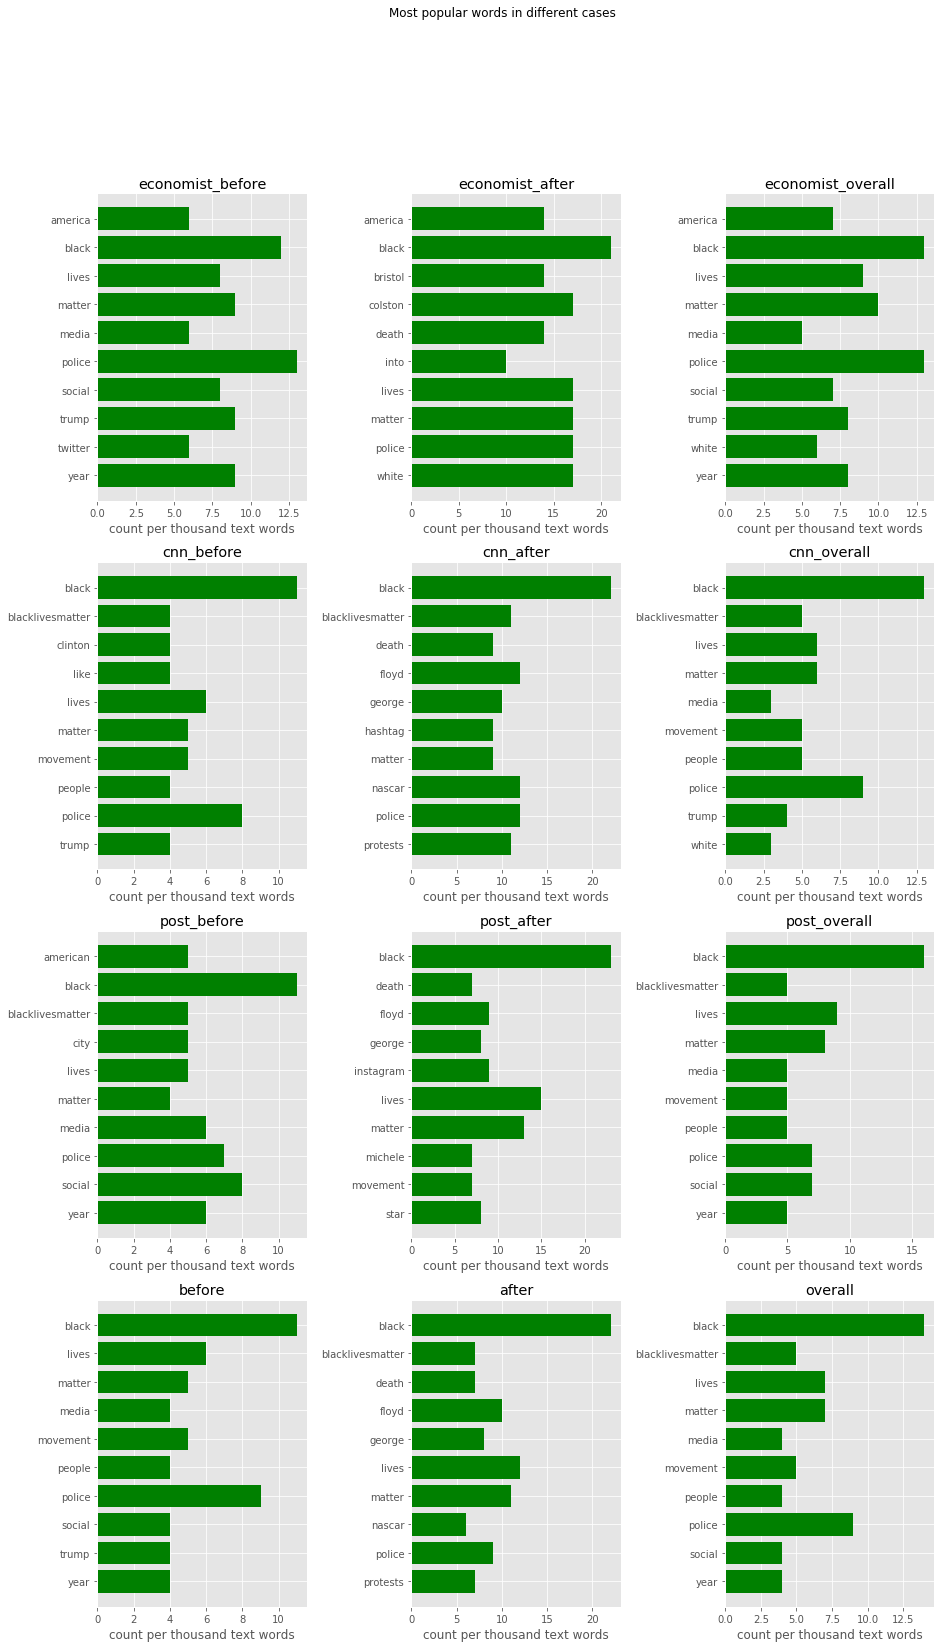

In [184]:
#Вспоминаем, что выше было отступление, в котором ыл приведен порядок таблиц в списке
#Теперь мы хотим вывести их в другом порядке, поэтом создадим словарь с нужным нам порядком названий
#И создадим массим, где перечислены номера данных таблиц в исходном списке (соответствие есть выше)
table=['economist_before','economist_after', 'economist_overall', 'cnn_before', 'cnn_after', 'cnn_overall', 'post_before', 'post_after', 
       'post_overall', 'before', 'after', 'overall']
number=[0,1,6,2,3,7,4,5,8,9,10,11]

#Теперь строим большую таблицу
plt.style.use('ggplot') #Для красотулички
fig, axs = plt.subplots(4,3, figsize=(15,26))
fig.suptitle('Most popular words in different cases')
plt.subplots_adjust(wspace = 0.5)

for j in range(4):
    for i in range(3):
        num=i+j*3 #создаем номерацию - это будут числа  от 0 до 11 попорядку 
        # С их помощью будем передвигаться по спискам с таблицами выше
        tab=number[num] #нужная таблица
        x = list(df_word_count_list[tab]['word'])
        count = list(df_word_count_list[tab]['count_per_thous'])
        x_pos = [i for i, _ in enumerate(x)]

        axs[j, i].set_title(table[num])
        axs[j, i].set_yticks(x_pos)
        axs[j, i].set_yticklabels(x)
        axs[j, i].barh(x_pos, count, color='green')

for ax in axs.flat:
    ax.set(xlabel='count per thousand text words', ylabel='')

Названия в нужном нам порядке, значит все как мы и хотели:

- По строкам идут три разлиный издания (The economist, CNN, New York Post) + общее по изданиям
- По столбцам: До смерти Джоржа Флойда, после и общее по периодам

(Если посмотреть по словам, то тоже видно, что Флойд появляется во втором столбце, что наводит на мысль, что мы не запутались)

## Выводы

**Видно, что после убийства Джоржда Флойда произошли изменения в словах, наиболее часто употребляемых изданиями в вводных абзацах к статьям, а именно:**

- После его убийства среди наиболее употребляемых появляется его имя, смерть, упоминание протестов и все чаще в самих статьях используется #BlackLivesMatter (В некоторых изданиях фигурирует Миннеаполис и растет частота употребления слова Америка) - это было ожидаемо

- Также в нескольких изданиях (The economist и CNN) помимо слова *black* стало часто употребляться и слово *white*. Возможно, это можно интерпретировать как больший акцент на расизме, либо как описание текущих событий - поведение тех и других во время протестов.

- И наоборот в среднем имена политиков (Трамп и Клинтон) исчезают из наиболее употребляемых - довольно интересное наблюдение, что фокус смещается с политиков к конкретным событиям

- Возрасла сама частота употребления ключевых слов: там слово *black* за последние пару недель стало употребляться в среднем 20+ раз на тысячу слов вместо 11

- Если сравнить статистику *до* и *в целом на текущий момент*, то видно, что помиио небольшого изменения частоты слов популярность набрал хештег BlackLivesMatter 

**Также можно заметить и разницу между изданиями:**

- Видно, что в The economist часто фигурирует слово *america* (после 25.05 появляется *Britain*), часто употребляемся Трамп и много говорится про полицию, нет хештега, нет протестов

- В CNN есть хештег как до, так и после. Часто упоминаются Клинтон и Трамп, не так часто упоминается полиция

- В New York Post хештег тоже есть как до, так и после. Не появляется слово *white*, часто употребялеся словов *social* и, что интересно, раньше среди часто встречаемых были университет и звезды, после - инстаграм

-Интересно, что *social* появляется в right biased журнале


## Эмоциональная окрашенность
Мы проанализировали какие слова чаще всего употребляются в журнальных статьях на данную тему. Теперь посмотрим на те эмоции, которые в большей степени вызывают данных отрывки из статей. (Напомню, что мы решили анализировать первые несколько абзацев, т.к. именно они призваны привлечь читателя к статье, значит и их эмоциальная окрашенность в первую очередь должна влиять на читателя)

Для этого мы воспользуемся сервисом *Tone Analyzer*, а именно прикрутим их **API**:
https://tone-analyzer-demo.ng.bluemix.net/

- *Tone Analyzer* проверяет к какой категории: Anger, Fear, Joy, Sadness, Analytical, Confident, Tentative, относится тональность текста (может быть несколько) и указывает вероятнотность, с которой текст к ней относится, в случае, если она больше 0.5

Мы хотим проанализировать наши исходные тексты (без вырезанных слов):

1) Создадим в исходных табличках с текстом и датой, которые мы спарсили 7 столбцов, соответсвующих указанным выше тональностям

2) Прогоним все наши данные через *Tone Analyzer* и в каждый столбец запишем вероятность, которую получим через API (если он не возвращает какую-либо категорию, то там указываем 0)
 

#### Отредактируем таблички, добавив нужные колонки, заполненные нулями

In [185]:
#Таблички нам еще понадобятся, поэтому сделаем копии:
df_economist_tone=df_economist.copy()
df_cnn_tone=df_cnn.copy()
df_post_tone=df_post.copy()
df_list_tone=[df_economist_tone, df_cnn_tone, df_post_tone]

# Новые колонки
names=['Anger', 'Fear', 'Joy', 'Sadness', 'Analytical', 'Confident', 'Tentative']
for df in df_list_tone: # Таблички лежат в df_list_tone
    #df.drop(['processed_text'], axis=1,inplace=True)
    for name in names:
        df[name]=0.0

#Пример того, что получилось
df_post_tone.iloc[[0,1,-1]]

,header,date,text,processed_text,Anger,Fear,Joy,Sadness,Analytical,Confident,Tentative
0,starbucks reverses ban on employees wearing bl...,2020-06-12,starbucks on friday said employees can wear bl...,"[starbucks, friday, employees, wear, black, li...",0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,‘glee’ star lea michele was a mean girl ‘from ...,2020-06-11,“glee” actress lea michele was always a mean g...,"[glee, actress, michele, always, mean, girl, a...",0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,5 hackiest moments from the season 4 premiere ...,2015-01-12,it’s sunday night at 9. do you know where your...,"[sunday, night, know, where, your, hipster, ch...",0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Прикрутим API
Это чуть более сложное API, нам потребуется поставить эту штуку:

In [186]:
#Оставлю в виде комментария, если вам удобнее установить другим способом
#import sys
#!"{sys.executable}" -m pip install --upgrade "ibm-watson>=4.5.0"

#### Важно! Тут не так много бесплатных использований
Моего ключа должно хватить на еще несколько раз, но если нет, то можно зарегистрироваться еще раз (start for free in IBM cloud по ссылке выше) и вставить свой ключ, либо ниже запустить код, который загрузит сохраненные мной таблички из csv

In [187]:
api_key='9_HywwWrn1IF-vd3zV68TV7T2f3PgkGFU7g04GGYgeRv'
url='https://api.eu-gb.tone-analyzer.watson.cloud.ibm.com/instances/5e1c9d39-55e9-44a5-9bb9-6509fa27d467'

In [188]:
#Подключаемся к API
from ibm_watson import ToneAnalyzerV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

authenticator = IAMAuthenticator(api_key)
tone_analyzer = ToneAnalyzerV3(
    version='2017-09-21',
    authenticator=authenticator
)
tone_analyzer.set_service_url(url)

#Примерчик, чтобы было видно, что происходит
import json
text = 'Hello world! You are so nice!'

tone_analysis = tone_analyzer.tone(
    {'text': text},
    content_type='application/json',
    sentences=False
).get_result()
tone_analysis

{'document_tone': {'tones': [{'score': 0.95007,
    'tone_id': 'joy',
    'tone_name': 'Joy'}]}}

In [189]:
#Обрабатываем наши таблички:
#Не очень быстро, несколько минут
for df in df_list_tone:
    for i in range(len(df['text'])):
        text=df['text'][i]
        tone_analysis = tone_analyzer.tone({'text': text}, content_type='application/json',
            sentences=False).get_result()
        for tone in tone_analysis['document_tone']['tones']:
            column_name=tone['tone_name']
            df[column_name][i]=tone['score']

C:\Users\mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [190]:
#Пример того, что получилось
df_post_tone.iloc[[0,1,-1]]
#Если посмотреть на больший кусок, то видно, что данные встречаются во всех колонках

,header,date,text,processed_text,Anger,Fear,Joy,Sadness,Analytical,Confident,Tentative
0,starbucks reverses ban on employees wearing bl...,2020-06-12,starbucks on friday said employees can wear bl...,"[starbucks, friday, employees, wear, black, li...",0.0,0.0,0.508615,0.0,0.000000,0.000000,0.579049
1,‘glee’ star lea michele was a mean girl ‘from ...,2020-06-11,“glee” actress lea michele was always a mean g...,"[glee, actress, michele, always, mean, girl, a...",0.0,0.0,0.570021,0.0,0.702184,0.691244,0.000000
79,5 hackiest moments from the season 4 premiere ...,2015-01-12,it’s sunday night at 9. do you know where your...,"[sunday, night, know, where, your, hipster, ch...",0.0,0.0,0.633226,0.0,0.826847,0.000000,0.000000


In [191]:
#df_economist_tone.to_csv('df_economist_tone.csv', index=False)
#df_cnn_tone.to_csv('df_cnn_tone.csv', index=False)
#df_post_tone.to_csv('df_post_tone.csv', index=False)

#### Если закончилось бесплатное использование и нет своего ключа:

In [192]:
#df_economist_tone=pd.read_csv('df_economist_tone.csv')
#df_cnn_tone=pd.read_csv('df_cnn_tone.csv')
#df_post_tone=pd.read_csv('df_post_tone.csv')

### Обработаем данные и визуализируем

Опять работа с pandas.DataFrame и визуальзация

In [193]:
#Сделаем одну большую табличку
df_tone=pd.concat(df_list_tone, keys=['economist', 'cnn', 'post'])
df_tone.reset_index(level=0, inplace=True)
df_tone.reset_index(level=0, drop=True, inplace=True)
df_tone.rename(columns={"level_0": "journal"}, inplace=True)
df_tone.iloc[[0,1,-1]]

,journal,header,date,text,processed_text,Anger,Fear,Joy,Sadness,Analytical,Confident,Tentative
0,economist,#blacklivesmatter,2015-01-15,every year several dictionary publishers and t...,"[every, year, several, dictionary, publishers,...",0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,economist,whatever happened to black lives matter?,2020-05-21,"the way tef poe sees it, nothing has improved ...","[sees, nothing, improved, ferguson, mostly, bl...",0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
259,post,5 hackiest moments from the season 4 premiere ...,2015-01-12,it’s sunday night at 9. do you know where your...,"[sunday, night, know, where, your, hipster, ch...",0.0,0.0,0.633226,0.0,0.826847,0.0,0.0


In [194]:
#Вот такие доли статей в среднем получаются по разным изданиям (суммируем ненулевые ячейки)
share=pd.concat([df_tone.iloc[:, [0,2]], df_tone.iloc[:, 5:]>0], axis=1).reindex().groupby('journal').mean()
#А это средние вероятности для тех, которые рапознал Tone analyzer (там где не нули)
prob=pd.concat([df_tone.iloc[:, [0]], df_tone.iloc[:, 5:].replace({0: np.nan})], axis=1).reindex().groupby('journal').mean()
pivot=pd.concat([share,prob], keys=['proportion', 'probability'])
pivot

Anger      Fear       Joy   Sadness  Analytical  \
            journal                                                         
proportion  cnn        0.069444  0.055556  0.243056  0.305556    0.416667   
            economist  0.027778  0.027778  0.111111  0.416667    0.388889   
            post       0.050000  0.012500  0.225000  0.225000    0.362500   
probability cnn        0.570167  0.606095  0.607718  0.586424    0.688790   
            economist  0.692364  0.708202  0.619972  0.598199    0.722641   
            post       0.585768  0.672452  0.628713  0.607836    0.707385   

                       Confident  Tentative  
            journal                          
proportion  cnn         0.187500   0.361111  
            economist   0.083333   0.361111  
            post        0.162500   0.325000  
probability cnn         0.688853   0.745097  
            economist   0.668872   0.725884  
            post        0.673905   0.687535

По табличке выше уже видно, что есть небольшие отличия между изданиями, но давайте **построим график с долей статей каждого типа и вероятностями** для каждого издания. Помним, что если в колоне стоит число, отличное от нуля, то *tone analyzer* отметил его тональность.

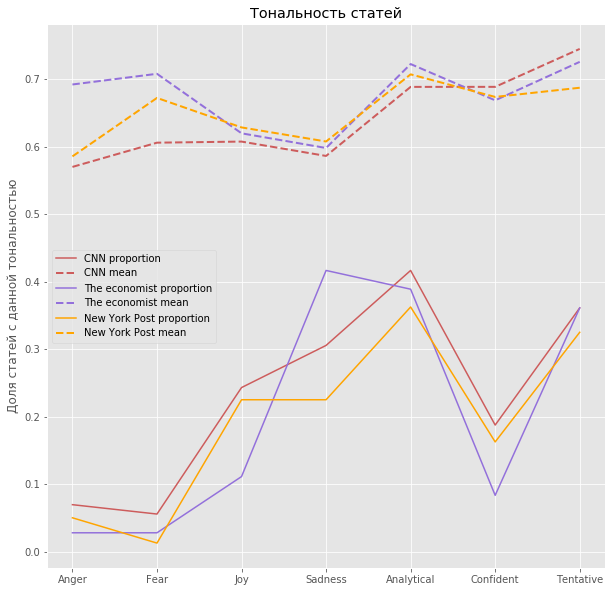

In [195]:
#Еще один не очень тривиальный код для графика
#Но самое главное что? Самое главное 10 минут выбирать красивые цвета
plt.style.use('ggplot')
plt.figure(figsize=(10,10))

x=np.arange(7) #Количество тональностей

labels=['CNN','The economist', 'New York Post']
colors=['indianred', 'mediumpurple', 'orange']

for i in range(3):
    y_1=list(pivot.iloc[i, :])
    y_2=list(pivot.iloc[3+i, :])
    
    plt.plot(x, y_1, label=labels[i]+' proportion', color=colors[i])
    plt.plot(x, y_2, label=labels[i]+' mean', linestyle = '--', linewidth = 2, color=colors[i])

plt.ylabel('Доля статей с данной тональностью') 
plt.title('Тональность статей')
plt.xticks(x, (names)) #Вставляем названия
plt.legend()
plt.show()

### Промежуточные выводы

Исходя из пропорций:

**Общее для всех изданий:**

- Чаще всего статьи имеют аналитический характер, но при этом и большая доля статей имеет грустную тональность, что вполне разумно в свете текущих событий

- Во всех изданиях много "предварительных/колеблющихся/неуверенных" (*tentative*) статей, что впослне свойственно теме, которую мы выбрали


**Но в тональности статей есть различия для разных изданий**

- В The economist большая доля статей с окраской *sadness* и меньшая доля статей с окраской *joy*

- В CNN больше всего аналитических и написанных с уверенностью статей

- В New York Post самая маленькая доля грустных статей и даже совпадает по количеству со статьями относящимися к *joy*

По графикам средней вероятности видно, что с наибольшей уверенностью статьи попадают в категории аналитических, страха и неопределенности.

**Попробуем визуализировать данные для временных промежутков**


C:\Users\mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mi\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


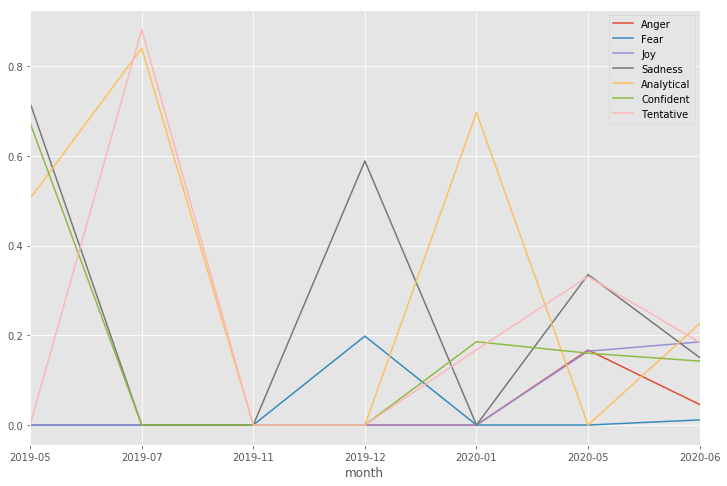

In [196]:
df_date=df_tone.iloc[:,[0,2,5,6,7,8,9,10,11]]
df_date['month']=[dat.to_period('m').strftime('%Y-%m')for dat in df_date['date']]
df_date.drop(['date'], axis=1,inplace=True)
date=df_date.groupby('month').mean()
date[45:].plot(figsize=(12,8))

К сожалению, красивого мало, но:

- В конце 19 года затишье, до мая 20 года много аналитических и грустных статей 

- В мае 20 года начинают появляться статьи с совершенно разной тональной окрашенностью, причем доля аналитических снижается, появляется злость - в целом более широкий эмоциональный спектр

#### Видно, что в мае-июне начинает расти sadness

Поэтому попробуем найти самый грустный днень - день, в который все три издания выпустили статьи охарактеризованные как грустные

Для этого воспользуемся **SQL**, чтобы красиво объединить таблички (В пандасе, конечно, на все есть функции, но джойнить там неприятно)

In [197]:
from sqlite3 import connect
conn = connect("my_database.sqlite")
c = conn.cursor()

In [198]:
c.execute("""DROP TABLE IF EXISTS economist""")
c.execute("""DROP TABLE IF EXISTS post""")
c.execute("""DROP TABLE IF EXISTS cnn""")
df_economist_tone.iloc[:,[1,4,5,6,7,8,9,10]].to_sql("economist", conn)
df_cnn_tone.iloc[:,[1,4,5,6,7,8,9,10]].to_sql("cnn", conn)
df_post_tone.iloc[:,[1,4,5,6,7,8,9,10]].to_sql("post", conn)

In [199]:
pd.read_sql("""SELECT economist.date, economist.Sadness as "economist.Sadness", cnn.Sadness as "cnn.Sadness", post.Sadness as "post.Anger"  FROM economist
JOIN cnn ON economist.date = cnn.date 
JOIN post ON cnn.date = post.date
GROUP BY economist.date 
Having economist.Sadness > 0""", conn)

,date,economist.Sadness,cnn.Sadness,post.Anger
0,2020-06-08 00:00:00,0.603001,0.649972,0.541541


Мы получили 8ое июня - разгар протестов и в США, и в Британии

## Логическое завершение

Мы скачали, обработали, визуализировали и проанализировали данные по различным статьям по запросу *#BlackLivesMatter*. Теперь неплохо бы с ними что-нибудь сделать. 

В выводах выше мы заметили, что статьи различаются для разных изданий. Попробуем построить простую модель, чтобы предсказывать к какому изданию скорее всего относится статья!

Для это возьмем данные по употребляемым в текстах словах, так как, к сожалению, эмоциональная окрашенность присутсвует далеко не во всех текстах и по ней будет сложно что-то предстказать. Также мы будем обучать простую модель классификации, поэтому не будет учитывать информацию о времени выхода статей.

Итак, возмем **LogisticRegression и RandomForestRegressor**

1) Обработаем данные, выбрав среди общего банка слов (который получился около 5000) 500 наиболее употребляемых и упорядочим.

2) Для каждой записи в данных построим вектор длины 500, где число на i-ом месте будет обочнаяать количество слов с этим номеров в общей базе, встреченных в тексте. Воспользуемся **numpy**, чтобы делать вменяемые матрицы + немного математики, чтобы **стандартизировать** (будем считать среднне и стандартное отклонение дляв всех столбцов) и **нормализовать** (посмотрим, что лучше) данные (в этом случае через numpy удобнее, чем работать с df)

3) Каждой записи поставим в соответсвие 0,1 или 2 - класс: The economist, CNN и New York Post соответсвенно

4) Поделим выборку на обучение и тест и обучим нашу модель

#### Готовим данные

In [200]:
n=500
#создаем вектор с наиболее ипотребляемыми словами, помним, что все слова были подсчитаны в words_count[11]
top_words=words_count[11].copy()
    
#Выбираем все ключи, сортируем по количеству раз, что они встречаются, оставляем 500 самых частых
keys=list(top_words.keys())
keys.sort(key=lambda x:-top_words[x])
keys=keys[0:n]

#Создаем общую табличку
df=pd.concat(df_list, keys=[0, 1, 2])
df.drop(['header','date','text'], axis=1,inplace=True)
df.reset_index(level=0, inplace=True)
df.reset_index(level=0, drop=True, inplace=True)
df.rename(columns={"level_0": "journal"}, inplace=True)
df.iloc[[0,1,-1]]

#Создаем матрицу
matrix=np.array([[0]*n]*len(df))
for i in range(len(df)):
    lst=df['processed_text'][i]
    for word in lst:
        if word in keys:
            matrix[i][keys.index(word)]+=1 
            
#Вектор с классами
y=np.array(df['journal'])

#Стандартизируем матрицу, то есть заменим x <- (x - mean) / standard_deviation
X_1=(matrix-matrix.mean(axis=0))/matrix.std(axis=0)
#Проверим, что теперь среднее во всех столбцах равно 0
print(np.prod(np.round(X_1.mean(axis=0),10)==0)==1)
#А стандартное отклонение 1
print(np.prod(np.round(X_1.std(axis=0),10)==1)==1)
#Округляем, что иметь возможность стравнить вещественные числа - они очень близки но не равны в точности

#Нормализуем матрицу,то есть заменим x <- (x - min) / (max-min); min=0
X_2=matrix/matrix.max(axis=0)

#Проверим, что теперь максимум во всех столбцах равен 1
print(np.prod(X_2.max(axis=0)==1)==1)

True
True
True


#### Научимся предсказывать

Мы возьмем *RandomForestRegressor* и *LogisticRegression*. Второй лучше работает на обработанных данных, поэтому проверим результаты для обычной матрицы, стандартизированных и нормализованных данных

In [201]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings

# Чтобы оценить работу классификаторов, прогоним из несколько раз и посчитаем среднюю точность предсказаний 
def compute_accuracy(X,y,n=100):    
    #Чтобы каждый раз не получать сообщения сделаем хитрую штуку
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        warnings.warn("deprecated", FutureWarning)

        logreg=[]
        forest=[]
        logreg_clf = LogisticRegression()
        forest_clf = RandomForestRegressor(n_estimators=15) #Тут я опытнам путем выбрала число 15
        for i in range(n):

            #Разбиваем рандомно выборку на тест и обучение, stratify чтобы были нужные пропорции у классов
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)   

            logreg_clf.fit(X_train, y_train)
            logreg_prediction=logreg_clf.predict(X_test)
            logreg.append(accuracy_score(logreg_prediction, y_test))

            forest_clf.fit(X_train, y_train)
            y_pred = forest_clf.predict(X_test)

            forest.append(accuracy_score(np.round(y_pred), y_test))
    
    
    

        print('Логистическая регрессия: ', np.array(logreg).mean())
        print('Лес: ', np.array(forest).mean())

        
#Теперь сравним на каких данных лучше работает Логистическая регрессия        
print('Не обработанные:')        
compute_accuracy(matrix,y,100)        
print('Стандартизированные:')        
compute_accuracy(X_1,y,100) 
print('Нормализованные:')        
compute_accuracy(X_2,y,100) 

Не обработанные:
Логистическая регрессия:  0.5521153846153846
Лес:  0.5769230769230769
Стандартизированные:
Логистическая регрессия:  0.4238461538461538
Лес:  0.5655769230769231
Нормализованные:
Логистическая регрессия:  0.5713461538461538
Лес:  0.5869230769230769


#### Нормализованные данные оказались однозначно лучше (на лес не влияют)

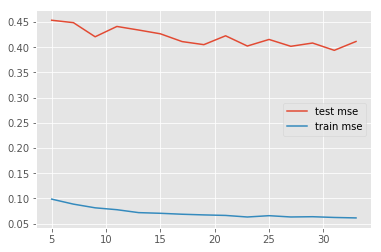

In [202]:
# Посмотрим на оптимальный размер леса
# Немного объемно, но ничего страшного
test_mses = []
train_mses = []
n = np.arange(5, 35 ,2)
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.20, stratify=y)

for number in n:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            warnings.warn("deprecated", FutureWarning)

            tree = RandomForestRegressor(n_estimators=number)
            test = []
            train = []

            for i in range(30):

                #Разбиваем рандомно выборку на тест и обучение, stratify чтобы были нужные пропорции у классов
                X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.20, stratify=y)   

                tree.fit(X_train, y_train)
                y_pred = tree.predict(X_test)

                test.append(((tree.predict(X_test) - y_test) ** 2).mean())
                train.append(((tree.predict(X_train) - y_train) ** 2).mean())

            test_mses.append(np.array(test).mean())
            train_mses.append(np.array(train).mean())
        
plt.plot(n, test_mses, label="test mse")
plt.plot(n, train_mses, label="train mse")
plt.legend()    

Видим, что 15-20 как раз достаточно

#### Итого:

- Лучшая точность предсказаний около 57%

- В среднем лес справляется чуть лучше

- Для логистической регрессии лучше всего подходят нормализованные данные

- С нормализованными данными результаты почти одинковые

**Обновление**: раньше лес предсказывал чуть лучше, на новых данных он стал чуть хуже, показатели логистической регрессии остались такие же - единственное изменение. Можете проверить на данных, сохраненных в csv

### Ура, научились предсказывать, к какому классу относится статья со средней точностью чуть меньше 60%!
Не идеально, но это гораздо лучше, чем тыкать наугад и больше, чем предсказывать один класс (3 класса -> вероятность 33%, один класс ~45%)!

In [203]:
#А тут можем предсказывать:
# Тут я брала лес, так как на старых данных он предсказывал чуть лучше, чел лог регрессия! 
    
def new_text(text):
    new_row=re.sub(r'[\W\d]',r' ',text.lower())
    new_row=re.sub(r'(?<!\S)(?:[\S]{1,3}|after|were|first|last|would|that|there|have|they|their|this|with|what|will|from|which|been|more|most|over|when|over|about|some|said)(?!\S)',r' ',new_row)
    list_of_words=re.sub(r'\s+',r' ', new_row).split()
    return list_of_words

def create_vector(words):
    matrix=np.array([[0]*500])
    for word in words:
        if word in keys:
            matrix[0][keys.index(word)]+=1
    return matrix

def predict(text):   
    forest = RandomForestRegressor(n_estimators=number)
    X_train, X_test, y_train, y_test = train_test_split(matrix, y, test_size=0.20, stratify=y)   
    forest.fit(X_train, y_train)
    
    text=text.title()
    words=new_text(text)
    vector=create_vector(words)
    y_pred = forest.predict(vector)
    
    print(np.round(y_pred))
    
predict('Aweek after the Trump administration ordered riot police to charge a peaceful crowd in Lafayette Square, it was transformed. The leafy park in front of the White House was enclosed by a steel fence, through which police could be seen loitering. The streets alongside it—including newly named “Black Lives Matter Plaza”, at the bottom of 16th Street, in direct view of the White House—had been colonised by protesters and were far more fun.')
#0- The economist что верно

[0.]


## Совсем логическое завершение

Мы посмотрели на данные, проанализировали различия во времени и между изданиями и научились с разумной точностью предсказывать, к какому изданию скорее всего относится данная статья, по набору слов.
 
И как финальный штрих воспользуемся **streamlite** и сделаем страничку, куда можно будет ввести текст и получить предсказание!

Для этого мы:

1) Сохраним данные, которые использовали для обучения (сохраним не обработанные, так как лес работает одинаково хорошо с любыми, а нам тогда не придется обрабатывать запрос пользователя) в csv и зальем на гитхаб

2) Создадим скрипт и обучим регрессор так же как в коде выше (только теперь выберем лес, так как он справляется немного лучше, обучим один раз для предсказаний и не будем гонять циклы)

3) Красивенько оформим страничку и задеплоим

Вот **[по этой ссылочке](https://fast-brook-89678.herokuapp.com/)** можно посмотреть, что получилось:

Код скрипта в папке *py*, файл *app.py*

In [204]:
#Сохраним нормализованные данные 
df = pd.DataFrame(np.concatenate((y.reshape(len(y),1),matrix), axis=1))
#df.to_csv('data_for_machine_learning.csv', index=False) #Я уже соранила и загрузила

#Вот тут лежат сохряненные данные
df=pd.read_csv('https://raw.githubusercontent.com/IYahooo/FinalProject/master/data_for_machine_learning.csv')
df[:3]

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
